# Exploring news extracted from FNC corpus and create a new corpus

Extracted news in spanish langauge from the FNC corpus: https://github.com/several27/FakeNewsCorpus. An open source dataset composed of millions of news articles. Around 9,400,000 articles.

To extract these news we followed the following steps on the 01 and 02 notebooks on data_transformation:

1. Extracted news with type `satire, fake and reliable` labels.

2. Detected news in spanish with langdetect.

3. Extracted news in spanish.

## Initial exploration

In [18]:
import pandas as pd

df = pd.read_csv('../data/news_csv_spanish.csv', usecols = ['domain', 'type', 'url', 'title', 'content'])

df.head()

,domain,type,url,content,title
0,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/allanada...,Esta mañana unidades del CTI allanaron las ofi...,Allanadas oficinas de Actualidad Panamericana ...
1,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/ya-abrie...,Algo de sosiego trajo a los miles de viajeros ...,Ya abrieron un D1 en trancón de La Línea
2,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/jaguares...,El fin de año es época de anuncios en el fútbo...,Jaguares anunció a Dimayor como patrocinador p...
3,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/embajado...,Un mico de última hora en la nueva ley que rig...,"Embajadora de Florhuila, Claudia Bahamón defie..."
4,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/guia-inv...,Cada nuevo año es la oportunidad para planear ...,Guía para invertir su dinero en 2018


Checking values types

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   domain   4612 non-null   object
 1   type     4612 non-null   object
 2   url      4612 non-null   object
 3   content  4612 non-null   object
 4   title    4612 non-null   object
dtypes: object(5)
memory usage: 180.3+ KB


Checking if there are NA Values

In [20]:
df.isnull().sum()

domain     0
type       0
url        0
content    0
title      0
dtype: int64

Number of news per Category 'Fake' and 'True'

type
fake         125
reliable    3164
satire      1323
dtype: int64


<AxesSubplot:xlabel='type'>

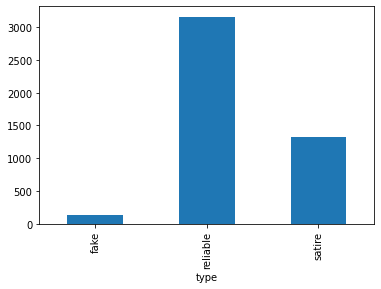

In [21]:
plot_cat = df.groupby('type').size()
print(plot_cat)

plot_cat.plot.bar()

##  Explore fake, reliable and satire news

In [22]:
# we got 125 fake news, 3164 reliable news and 1323 satire news

df_satire = df[df['type'] == 'satire']
df_reliable = df[df['type'] == 'reliable']
df_fake = df[df['type'] == 'fake']

In [23]:
# check reliable news sources with 'domain'

df_reliable.groupby('domain').size().sort_values(ascending = False)

domain
nutritionfacts.org        3084
nytimes.com                 55
in.reuters.com               6
latino.foxnews.com           5
www.cbsnews.com              4
www.buzzfeed.com             3
www.msn.com                  2
www.nba.com                  1
www.huffingtonpost.com       1
www.cnet.com                 1
wiki.mozilla.org             1
news.yahoo.com               1
dtype: int64

In [24]:
# check fake news sources with 'domain'

df_fake.groupby('domain').size().sort_values(ascending = False)

domain
beforeitsnews.com    125
dtype: int64

In [25]:
# check satire news sources with 'domain'

df_satire.groupby('domain').size().sort_values(ascending = False)

domain
actualidadpanamericana.com    1278
elmundotoday.com                45
dtype: int64

# Create a new dataframe

1. Drop `reliable` news domain 'nutritionfacts.org':
    - Short title/headline without information
    - New's content is usually short.    


2. Unify `satire` and `fake` types, priorize news from Spain.


3. Load and unify reliable news extracted


4. Export


5. Unify this corpus with the Spanish Fake News Corpus and export it

## 1. Drop nutritionfacts.org reliable news

In [26]:
# drop
df.drop(df[df['domain'] == 'nutritionfacts.org' ].index , inplace = True)
df.reset_index(inplace = True, drop = True)

# check
df_reliable = df[df['type'] == 'reliable']
df_reliable = df[df['type'] == 'reliable']
df_fake = df[df['type'] == 'fake']

print(df.groupby('type').size(), '\n\n', df_reliable.groupby('domain').size().sort_values(ascending = False))

type
fake         125
reliable      80
satire      1323
dtype: int64 

 domain
nytimes.com               55
in.reuters.com             6
latino.foxnews.com         5
www.cbsnews.com            4
www.buzzfeed.com           3
www.msn.com                2
www.nba.com                1
www.huffingtonpost.com     1
www.cnet.com               1
wiki.mozilla.org           1
news.yahoo.com             1
dtype: int64


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   domain   1528 non-null   object
 1   type     1528 non-null   object
 2   url      1528 non-null   object
 3   content  1528 non-null   object
 4   title    1528 non-null   object
dtypes: object(5)
memory usage: 59.8+ KB


In [28]:
df_satire.sample(5)

,domain,type,url,content,title
1660,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/lagrimon...,El reconocido actor colombiano “Lagrimón” fue ...,Lagrimón gana premio Emmy a mejor actor de rep...
1509,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/fecode-p...,Fecode anunció en la tarde de este miércoles q...,Fecode prepara “la marcha de los perros”
1417,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/teorias-...,El diario romano “Il BonGiorno” reveló hoy que...,Teorías apuntan a que el “Manto sagrado” puede...
1136,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/chaman-a...,"El reconocido chamán Arnulfo Pataquein, famoso...",Chamán asegura que si la cerveza no baja de pr...
1551,actualidadpanamericana.com,satire,http://www.actualidadpanamericana.com/vendedor...,Alertados por la transición de movimiento arma...,Vendedores de votos ya invaden zonas de concen...


## 2. Unify satire and fake news

In [29]:
df['type'] = df['type'].str.replace('fake', 'Fake')
df['type'] = df['type'].str.replace('satire', 'Fake')
df['type'] = df['type'].str.replace('reliable', 'True')

In [30]:
df

,domain,type,url,content,title
0,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/allanada...,Esta mañana unidades del CTI allanaron las ofi...,Allanadas oficinas de Actualidad Panamericana ...
1,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/ya-abrie...,Algo de sosiego trajo a los miles de viajeros ...,Ya abrieron un D1 en trancón de La Línea
2,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/jaguares...,El fin de año es época de anuncios en el fútbo...,Jaguares anunció a Dimayor como patrocinador p...
3,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/embajado...,Un mico de última hora en la nueva ley que rig...,"Embajadora de Florhuila, Claudia Bahamón defie..."
4,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/guia-inv...,Cada nuevo año es la oportunidad para planear ...,Guía para invertir su dinero en 2018
...,...,...,...,...,...
1523,nytimes.com,True,https://www.nytimes.com/2016/01/11/universal/e...,"“Pero a mí me parece grotesco”, añadió Rubio.\...",Las incursiones de Sean Penn en el reportaje s...
1524,nytimes.com,True,https://www.nytimes.com/2016/01/12/universal/e...,"Photo\n\nDavid Bowie, camaleón de intensa mira...","David Bowie, un outsider que se transformó en ..."
1525,nytimes.com,True,https://www.nytimes.com/2016/01/13/universal/e...,Éstos son algunos fragmentos de nuestra conver...,Cómo las dietas desatan una batalla perdida en...
1526,nytimes.com,True,https://www.nytimes.com/2016/01/15/universal/e...,"En el primero, las variaciones en los niveles ...",Paul Krugman: ¿Es necesaria tanta desigualdad?


## 3. Classify the news according to its topic.

On this case we can't classify topics with the url. So I created a basic topic classifier with the `corpus_spanis.csv` as training, and a TFIDF transformer to extract features.

It has a 76% of accuracy, it's not the best one, but `topic` is not a feature selected for our fake news classifier.

In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords  
from nltk import word_tokenize  
from nltk.data import load  
from nltk.stem import SnowballStemmer  
from string import punctuation

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

df_train = pd.read_csv('../data/corpus_spanish.csv')
labels = df_train.Topic

traindex = pd.RangeIndex(start = 0, stop = 971, step = 1)
predictindex = pd.RangeIndex(start = 0, stop = 2499, step = 1)

# concat training and predict df
df_train['content'] = df_train['Text']
df_corpus = pd.concat([df_train[['content']], df[['content']]], axis = 0)

df_corpus.reset_index(inplace = True, drop = True)

####### TFIDF Transformation to text ########

#Stopword list to use
spanish_stopwords = stopwords.words('spanish')

#Spanish stemmer:
stemmer = SnowballStemmer('spanish')

def stem_tokens(tokens, stemmer):  
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

#Punctuation to remove
non_words = list(punctuation)

#Adding spanish punctuation
non_words.extend(['¿', '¡'])  
non_words.extend(map(str,range(10)))

def tokenize(text):  
    #Remove punctuation
    text = ''.join([c for c in text if c not in non_words])
    #Tokenize
    tokens =  word_tokenize(text)

    #Stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems


tfidf_vectorizer = TfidfVectorizer(  
                analyzer = 'word',
                tokenizer = tokenize,
                lowercase = True,
                stop_words = spanish_stopwords)

text_vectorized = tfidf_vectorizer.fit_transform(df_corpus['content']) 

X = text_vectorized[0: traindex.shape[0]]
X_predict = text_vectorized[traindex.shape[0]:]

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.3, random_state = 43)


##### Passive Aggresive Classifier #####

pa_classifier = PassiveAggressiveClassifier(max_iter = 50)
pa_classifier.fit(X_train, y_train)

/home/pipe11/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


PassiveAggressiveClassifier(max_iter=50)

#### Results

In [32]:
y_pred = pa_classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 72.26%


In [33]:
cf_matrix = confusion_matrix(y_test,y_pred, labels = ['Politics', 'Entertainment', 'Society', 'Sport', 'Science', 'Health', 'Economy', 'Security', 'Education'])
print(cf_matrix)

[[81  3  3  2  1  0  1  0  0]
 [ 9 24  2  3  1  0  0  0  0]
 [10  5 23  1  4  2  0  0  0]
 [ 1  1  0 36  0  0  0  0  0]
 [ 3  0  1  0 22  1  0  0  0]
 [ 1  0  4  0  1 12  0  0  0]
 [ 6  1  0  0  1  0  4  0  0]
 [ 6  0  3  0  1  0  0  4  0]
 [ 2  0  1  0  0  0  0  0  5]]


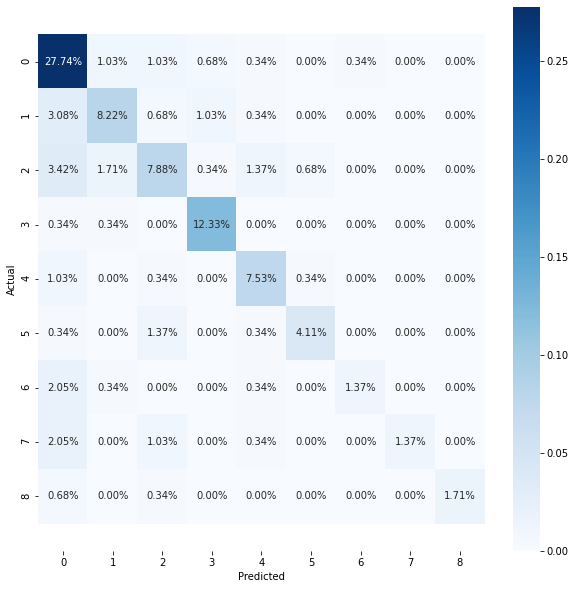

In [34]:
plt.figure(figsize = (10, 10))

ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True, fmt = '.2%', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Predictions: Classification 

In [35]:
predictions = pa_classifier.predict(X_predict)
predictions

array(['Society', 'Entertainment', 'Sport', ..., 'Health', 'Science',
       'Society'], dtype='<U13')

In [36]:
df['Topic'] = predictions

In [37]:
df

,domain,type,url,content,title,Topic
0,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/allanada...,Esta mañana unidades del CTI allanaron las ofi...,Allanadas oficinas de Actualidad Panamericana ...,Society
1,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/ya-abrie...,Algo de sosiego trajo a los miles de viajeros ...,Ya abrieron un D1 en trancón de La Línea,Entertainment
2,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/jaguares...,El fin de año es época de anuncios en el fútbo...,Jaguares anunció a Dimayor como patrocinador p...,Sport
3,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/embajado...,Un mico de última hora en la nueva ley que rig...,"Embajadora de Florhuila, Claudia Bahamón defie...",Society
4,actualidadpanamericana.com,Fake,http://www.actualidadpanamericana.com/guia-inv...,Cada nuevo año es la oportunidad para planear ...,Guía para invertir su dinero en 2018,Society
...,...,...,...,...,...,...
1523,nytimes.com,True,https://www.nytimes.com/2016/01/11/universal/e...,"“Pero a mí me parece grotesco”, añadió Rubio.\...",Las incursiones de Sean Penn en el reportaje s...,Entertainment
1524,nytimes.com,True,https://www.nytimes.com/2016/01/12/universal/e...,"Photo\n\nDavid Bowie, camaleón de intensa mira...","David Bowie, un outsider que se transformó en ...",Entertainment
1525,nytimes.com,True,https://www.nytimes.com/2016/01/13/universal/e...,Éstos son algunos fragmentos de nuestra conver...,Cómo las dietas desatan una batalla perdida en...,Health
1526,nytimes.com,True,https://www.nytimes.com/2016/01/15/universal/e...,"En el primero, las variaciones en los niveles ...",Paul Krugman: ¿Es necesaria tanta desigualdad?,Science


In [38]:
df.columns = ['Source', 'Category', 'Link', 'Text', 'Headline', 'Topic']
df = df[['Category', 'Topic', 'Source', 'Headline', 'Text', 'Link']]

df

,Category,Topic,Source,Headline,Text,Link
0,Fake,Society,actualidadpanamericana.com,Allanadas oficinas de Actualidad Panamericana ...,Esta mañana unidades del CTI allanaron las ofi...,http://www.actualidadpanamericana.com/allanada...
1,Fake,Entertainment,actualidadpanamericana.com,Ya abrieron un D1 en trancón de La Línea,Algo de sosiego trajo a los miles de viajeros ...,http://www.actualidadpanamericana.com/ya-abrie...
2,Fake,Sport,actualidadpanamericana.com,Jaguares anunció a Dimayor como patrocinador p...,El fin de año es época de anuncios en el fútbo...,http://www.actualidadpanamericana.com/jaguares...
3,Fake,Society,actualidadpanamericana.com,"Embajadora de Florhuila, Claudia Bahamón defie...",Un mico de última hora en la nueva ley que rig...,http://www.actualidadpanamericana.com/embajado...
4,Fake,Society,actualidadpanamericana.com,Guía para invertir su dinero en 2018,Cada nuevo año es la oportunidad para planear ...,http://www.actualidadpanamericana.com/guia-inv...
...,...,...,...,...,...,...
1523,True,Entertainment,nytimes.com,Las incursiones de Sean Penn en el reportaje s...,"“Pero a mí me parece grotesco”, añadió Rubio.\...",https://www.nytimes.com/2016/01/11/universal/e...
1524,True,Entertainment,nytimes.com,"David Bowie, un outsider que se transformó en ...","Photo\n\nDavid Bowie, camaleón de intensa mira...",https://www.nytimes.com/2016/01/12/universal/e...
1525,True,Health,nytimes.com,Cómo las dietas desatan una batalla perdida en...,Éstos son algunos fragmentos de nuestra conver...,https://www.nytimes.com/2016/01/13/universal/e...
1526,True,Science,nytimes.com,Paul Krugman: ¿Es necesaria tanta desigualdad?,"En el primero, las variaciones en los niveles ...",https://www.nytimes.com/2016/01/15/universal/e...


### 4. Load and unify reliable news extracted

In [40]:
df2 = pd.read_csv('../data/reliable_spanish_news.csv')
df2[['Category', 'Topic', 'Source', 'Headline', 'Text', 'Link']]
df2

,Topic,Source,Headline,Text,Link,Category
0,Entertainment,Europa Press,El festival multidisciplinar 'Granada Noir' ar...,"PP pide explicaciones a Junta por ""recorte"" de...",http://www.20minutos.es/noticia/2852917/0/fest...,True
1,Society,Europa Press,"Víctimas y automovilistas ven ""positivo"" el de...","Asociaciones de víctimas, automovilistas y mot...",http://www.europapress.es/sociedad/noticia-vic...,True
2,Economy,Europa Press,Nueve secretos para invertir con éxito de Garc...,Nueve secretos para invertir con éxito de Garc...,http://www.europapress.es/economia/noticia-nue...,True
3,Education,Europa Press,"El Consell Escolar inicia un debate ""sin restr...",El Consell Escolar de Catalunya (CEC) ha abier...,http://www.europapress.es/catalunya/noticia-co...,True
4,Politics,Europa Press,Los colombianos comienzan a votar este domingo...,"Los colombianos, con su presidente, Juan Manue...",http://www.europapress.es/internacional/notici...,True
...,...,...,...,...,...,...
1470,Sport,Europa Press,Hamilton manda en los primeros libres; Sainz y...,El piloto inglés Lewis Hamilton (Mercedes) fue...,http://www.europapress.es/deportes/formula1-00...,True
1471,Economy,Europa Press,El superávit por cuenta corriente se duplica e...,"La balanza por cuenta corriente, que mide los ...",http://www.europapress.es/economia/macroeconom...,True
1472,Sport,Europa Press,"Clasificación de la carrera, del Mundial de Pi...",Esta es la clasificación del Gran Premio de Ja...,http://www.europapress.es/deportes/formula1-00...,True
1473,Entertainment,Europa Press,El Reina Sofía expone su 'fondo de armario' de...,El Museo Reina Sofía inaugura este martes 25 d...,http://www.europapress.es/cultura/exposiciones...,True


In [41]:
df_final = pd.concat([df, df2])
df_final = df_final.sample(frac = 1)
df_final.reset_index(inplace = True, drop = True)

df_final.to_csv('../data/corpus_spanish_v2.csv')

### 5. Unify this corpus with the Spanish Fake News Corpus

In [42]:
import pandas as pd

In [43]:
df1 = pd.read_csv('../data/corpus_spanish.csv')
del df1['Id']
df2 = pd.read_csv('../data/corpus_spanish_v2.csv', index_col = 0)

In [44]:
df1

,Category,Topic,Source,Headline,Text,Link
0,Fake,Politics,El Ruinaversal,Rosario Robles se integra al equipo de Meade y...,Rosario Robles se integra al equipo de Meade y...,http://www.elruinaversal.com/2018/02/24/rosari...
1,Fake,Science,Opinión,La Tierra es deforme como una papa,La Tierra es deforme como una papa Después de ...,http://www.opinion.com.bo/opinion/articulos/20...
2,True,Politics,Excelsior,Coincide AMLO con propuesta de eliminar financ...,Coincide AMLO con propuesta de eliminar financ...,https://www.excelsior.com.mx/nacional/2017/09/...
3,True,Entertainment,Telemundo,"Peter ""la Ánguila""salió de la cárcel y está de...","Peter ""la Ánguila""salió de la cárcel y está de...",http://www.telemundo.com/entretenimiento/2017/...
4,True,Sport,ESPN,Gullit Peña se rehabilita en centro de JC Chávez,Gullit Peña se rehabilita en centro de JC Cháv...,http://www.espn.com.mx/futbol/mexico/nota/_/id...
...,...,...,...,...,...,...
966,Fake,Health,Eco Portal,La FDA finalmente admite que el pollo contiene...,La FDA finalmente admite que el pollo contiene...,https://www.ecoportal.net/paises/estados-unido...
967,Fake,Society,El Dizque,"""Desamigar"" en Facebook se considerará como di...","""Desamigar"" en Facebook se considerará como di...",https://www.eldizque.com/desamigar-en-facebook...
968,True,Entertainment,Caras,Sofía Castro y Alejandro Peña Pretelini: una i...,Sofía Castro y Alejandro Peña Pretelini: una i...,https://www.caras.com.mx/sofia-castro-alejandr...
969,True,Entertainment,BBC,"Hackean el video de ""Despacito"" en YouTube, el...","Hackean el video de ""Despacito"" en YouTube, el...",http://www.bbc.com/mundo/noticias-43714762


In [47]:
df_final = pd.concat([df1, df2])
df_final = df_final.sample(frac = 1)
df_final.reset_index(inplace = True, drop = True)

df_final.to_csv('../data/corpus_spanish_v3.csv')

In [48]:
df_final

,Category,Topic,Source,Headline,Text,Link
0,True,Science,El país,La NASA recupera el contacto con un satélite d...,La NASA recupera el contacto con un satélite d...,https://elpais.com/elpais/2018/02/01/ciencia/1...
1,True,Economy,El financiero,AMLO aceleraría el consumo y el crecimiento ec...,AMLO aceleraría el consumo y el crecimiento ec...,http://www.elfinanciero.com.mx/economia/amlo-a...
2,Fake,Sport,actualidadpanamericana.com,Compañero de James se ‘calvea’ y le juega pesa...,Al borde de un colapso nervioso quedó el hábil...,http://www.actualidadpanamericana.com/companer...
3,Fake,Politics,actualidadpanamericana.com,Dian gravará este año a los niños que recojan ...,"Mediante pupitrazo de último minuto anoche, el...",http://www.actualidadpanamericana.com/dian-gra...
4,Fake,Politics,actualidadpanamericana.com,Uribe asegura que insultó 358 guerrilleros,Muy temprano esta mañana el expresidente y aho...,http://www.actualidadpanamericana.com/uribe-as...
...,...,...,...,...,...,...
3969,True,Sport,Forbes,FIFA levanta sanción a Messi para regresar a l...,FIFA levanta sanción a Messi para regresar a l...,https://www.forbes.com.mx/fifa-levanta-sancion...
3970,True,Education,Europa Press,El debate sobre los deberes llega al Congreso ...,El debate sobre los deberes llega al Congreso ...,http://www.europapress.es/sociedad/educacion-0...
3971,Fake,Society,actualidadpanamericana.com,Tuiteros emberracados podrán juzgar algunos de...,Como un paso decisivo en la descongestión judi...,http://www.actualidadpanamericana.com/tuiteros...
3972,Fake,Science,actualidadpanamericana.com,Ojear pantallas ajenas en Transmilenio ya es u...,Muy preocupada se declaró la Secretaría de Sal...,http://www.actualidadpanamericana.com/ojear-pa...
